<a href="https://colab.research.google.com/github/IgnacioPardo/SNN/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [2]:
np.random.seed(1)

Dataset y arreglos

In [3]:
ruta = 'C:\\Users\\47571805\\Documents\\TPNN\\archive (3)\\seattle-weather.csv'

In [4]:
datos = pd.read_csv(ruta)
print(datos.dtypes)
print(datos)

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [5]:
datos

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [6]:
# Eliminar la columna 'Proced' y 'ATC'
datos.drop('date', axis=1, inplace=True)

In [7]:
# Aplicar One-Hot Encoding
datos = pd.get_dummies(datos, columns=['weather'])

In [8]:
columns_to_convert = ['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
datos[columns_to_convert] = datos[columns_to_convert].astype(int)

In [9]:
datos

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,0,0,0,0
1,10.9,10.6,2.8,4.5,0,0,1,0,0
2,0.8,11.7,7.2,2.3,0,0,1,0,0
3,20.3,12.2,5.6,4.7,0,0,1,0,0
4,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,0,0,0,0,1


### Funciones

In [10]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

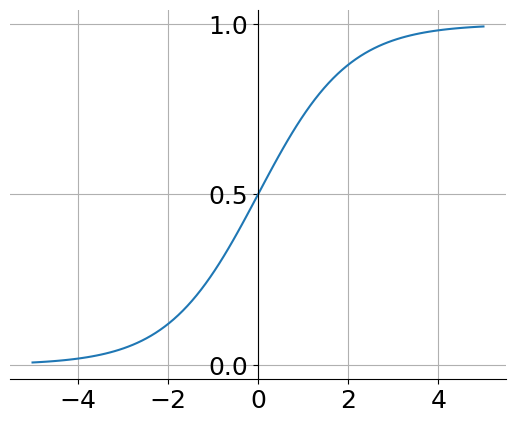

In [11]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

Aca podemos ver como nuesta NN utilizara la funcion de activacion sigmoide la cual definira que los valores de salida que obtendremos estaran en un valor en el rango de 0 a 1

## Setup

### Values

#### Training Values

In [12]:
training_inputs = datos[['precipitation', 'temp_max', 'temp_min', 'wind']]
training_outputs = datos[['weather_drizzle', 'weather_fog', 'weather_sun', 'weather_rain', 'weather_snow']]

display(training_inputs)
display(training_outputs)


,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


,weather_drizzle,weather_fog,weather_sun,weather_rain,weather_snow
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,1,0,0,0
1459,0,0,1,0,0


In [13]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,12.8,5,4.7,1,0,0,0,0
10.9,10.6,2.8,4.5,0,0,0,1,0
0.8,11.7,7.2,2.3,0,0,0,1,0
20.3,12.2,5.6,4.7,0,0,0,1,0
1.3,8.9,2.8,6.1,0,0,0,1,0
2.5,4.4,2.2,2.2,0,0,0,1,0
0,7.2,2.8,2.3,0,0,0,1,0
0,10,2.8,2,0,0,1,0,0
4.3,9.4,5,3.4,0,0,0,1,0
1,6.1,0.6,3.4,0,0,0,1,0
0,6.1,-1.1,5.1,0,0,1,0,0


Nuestra NN tendra una capa de entrada con la cantidad de neuronas de nuestros training inputs (es decir, 4) y una capa de salida con la cantidad de neuronas de nuestros training outputs(es decir, 5). Podremos obtener que chances hay de tener cada caracteristica climatica al final de la red. 

#### Synaptic weights 

In [14]:
n = training_inputs.shape[1]

synaptic_weights = 2 + np.random.random((4, 5)) - 1  

synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437, 1.30233257, 1.14675589],
       [1.09233859, 1.18626021, 1.34556073, 1.39676747, 1.53881673],
       [1.41919451, 1.6852195 , 1.20445225, 1.87811744, 1.02738759],
       [1.67046751, 1.4173048 , 1.55868983, 1.14038694, 1.19810149]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [15]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

La "foward propagation" es donde se calcula el resultado de la red neuronal a partir de los valores de entrada y los pesos de las neuronas. La foward propagation se ve en el eval_NN calcula la suma de los valores de entrada multiplicados por sus respectivos pesos sinápticos, y luego aplica la función sigmoide al resultado para normalizarlo a un valor entre 0 y 1.

In [16]:
# 50000 epochs
for iteration in range(0000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = eval_NN(input_layer, synaptic_weights).T

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

ValueError: Unable to coerce to DataFrame, shape must be (1461, 5): given (5, 1461)

La "backward propagation" es donde se ajustan los pesos sinápticos de la red neuronal en función del error de la red. Esto se puede ver con la linea de: adjustments = error * sigmoid_derivative(outputs) y la de: synaptic_weights += np.dot(input_layer.T, adjustments). Se calcula el error con respecto a los pesos, y luego utiliza este para actualizar los pesos.
En la línea de adjustments(...) se calcula el gradiente del error con respecto a los pesos. El gradiente es una medida de la dirección en la que se debe mover para reducir el error. Asi es como finalmente se puede actualizar en la siguiente linea de codigo. El gradiente descendente es un algoritmo de optimización que se utiliza para minimizar la función de pérdida de una red neuronal. 

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[  -0.97904668  -24.73780638  -45.599381     31.56233171    1.3048908 ]
 [ -47.48843898 -311.84065114  -51.2867528  -140.73142079  -24.47902216]
 [  -2.80907435 -157.17749836  -42.4990932   -69.46293102    2.35082571]
 [ -13.82346764  -56.8116018    -7.9382862    -2.27999565   -7.81905448]]
Outputs after training: 
[[4.97912550e-299 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.16543855e-147]
 [2.08869426e-254 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.16167990e-119]
 [5.85774908e-265 0.00000000e+000 0.00000000e+000 0.00000000e+000
  4.07393644e-125]
 ...
 [1.46714633e-165 0.00000000e+000 3.91305764e-181 0.00000000e+000
  1.73624910e-085]
 [2.06063391e-135 0.00000000e+000 1.00818411e-118 0.00000000e+000
  7.92939483e-073]
 [1.13662527e-134 0.00000000e+000 9.15419604e-099 4.16953866e-283
  2.73285836e-074]]


## Eval

In [17]:
table(training_values)

0,12.8,5,4.7,1,0,0,0,0
10.9,10.6,2.8,4.5,0,0,0,1,0
0.8,11.7,7.2,2.3,0,0,0,1,0
20.3,12.2,5.6,4.7,0,0,0,1,0
1.3,8.9,2.8,6.1,0,0,0,1,0
2.5,4.4,2.2,2.2,0,0,0,1,0
0,7.2,2.8,2.3,0,0,0,1,0
0,10,2.8,2,0,0,1,0,0
4.3,9.4,5,3.4,0,0,0,1,0
1,6.1,0.6,3.4,0,0,0,1,0
0,6.1,-1.1,5.1,0,0,1,0,0


In [18]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [26]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}
d = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d])
res = sigmoid(np.dot(input_layer, synaptic_weights))
display(res)

thresh = 0.5
out = np.any(res > thresh)

large(out)

array([0.99631217, 0.99754974, 0.99399307, 0.9967232 , 0.99268918])

In [27]:
def get_categories(res):
    categories = []
    for i in range(len(res)):
        if res[i] > 0.5:
            categories.append(datos.columns[i + 4])
    return categories

In [28]:
print(get_categories(res))

['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']
